## Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create DataFrames

### Ebay Data

In [2]:
df_ebay = pd.read_json('../output/ebay_baseball_spider_20230604.json')
df_ebay['price'] = df_ebay['price'].str.replace('[\$,]', '', regex=True).astype(float)
df_ebay['date_sold'] = pd.to_datetime(df_ebay['date_sold'])
df_ebay['num_bids'] = df_ebay['num_bids'].str.extract('(\d+)', expand=False).astype(float)
df_ebay['seller_num_reviews'] = df_ebay['seller_num_reviews'].str.replace(',', '').astype(int)
df_ebay['seller_pct_positive_feedback'] = df_ebay['seller_pct_positive_feedback'].str.replace('%', '').astype(float) / 100


df_ebay['shipping'] = df_ebay['shipping'].replace(['Free Shipping', 'Free shipping', None], '+$0.00 Shipping')
df_ebay['shipping'] = df_ebay['shipping'].str.replace('\+\$(\d+\.\d+).*', r'\1', regex=True).astype(float)

df_ebay['nameUpper'] = df_ebay['name'].str.upper()

df_ebay

,date_sold,name,link,condition,price,num_bids,shipping,seller_username,seller_num_reviews,seller_pct_positive_feedback,nameUpper
0,2023-06-04,2018 Topps Trayce Thompson #654 Los Angeles D...,https://www.ebay.com/itm/314513670222?hash=ite...,Pre-Owned,1.50,NaN,0.00,youngstreet1028,4191,1.000,2018 TOPPS TRAYCE THOMPSON #654 LOS ANGELES D...
1,2023-06-04,2022 TOPPS STADIUM CLUB CHROME BASEBALL TEOSCA...,https://www.ebay.com/itm/275854921357?hash=ite...,None,0.99,2.0,0.99,kidder.cards,2659,1.000,2022 TOPPS STADIUM CLUB CHROME BASEBALL TEOSCA...
2,2023-06-04,ANDRE DAWSON RC 1977 Topps Baseball Rookie Car...,https://www.ebay.com/itm/304960085874?epid=505...,None,8.50,6.0,1.10,burker72,3735,1.000,ANDRE DAWSON RC 1977 TOPPS BASEBALL ROOKIE CAR...
3,2023-06-04,2022 Bowman Chrome Hunter Greene RC Rookie Bas...,https://www.ebay.com/itm/235029565751?hash=ite...,Pre-Owned,0.99,1.0,0.60,best-value,64,1.000,2022 BOWMAN CHROME HUNTER GREENE RC ROOKIE BAS...
4,2023-06-04,RYAN BRAUN 2007 TRI STAR MLB BASEBALL CERTIFIE...,https://www.ebay.com/itm/175712878924?hash=ite...,None,9.98,NaN,0.00,tgsportscards,9389,1.000,RYAN BRAUN 2007 TRI STAR MLB BASEBALL CERTIFIE...
...,...,...,...,...,...,...,...,...,...,...,...
10015,2023-06-04,2001 Donruss Stat Line Career Anaheim Angels B...,https://www.ebay.com/itm/166047453270?epid=140...,None,2.10,NaN,0.99,burbanksportscards,459146,0.996,2001 DONRUSS STAT LINE CAREER ANAHEIM ANGELS B...
10016,2023-06-04,1998 Donruss Gold Press Proofs Anaheim Angels ...,https://www.ebay.com/itm/314549288780?hash=ite...,None,4.80,NaN,0.99,burbanksportscards,459146,0.996,1998 DONRUSS GOLD PRESS PROOFS ANAHEIM ANGELS ...
10017,2023-06-04,1997 Circa Rave California Angels Baseball Car...,https://www.ebay.com/itm/314549469284?hash=ite...,None,9.60,NaN,0.99,burbanksportscards,459146,0.996,1997 CIRCA RAVE CALIFORNIA ANGELS BASEBALL CAR...
10018,2023-06-04,1998 Studio Gold Press Proofs Anaheim Angels B...,https://www.ebay.com/itm/363442394798?hash=ite...,None,2.50,NaN,0.99,burbanksportscards,459146,0.996,1998 STUDIO GOLD PRESS PROOFS ANAHEIM ANGELS B...


### MLB Stats

In [3]:
df_mlb = pd.read_json('../output/mlb_stats_spider_20230604.json')
df_mlb['playerNameUpper'] = df_mlb['playerName'].str.upper()
df_mlb

,year,playerId,playerName,type,rank,playerFullName,playerFirstName,playerLastName,playerUseName,playerInitLastName,...,lineOuts,groundOuts,flyHits,popHits,lineHits,groundHits,airOuts,groundOutsToAirouts,catchersInterference,playerNameUpper
0,1900,123784,Honus Wagner,player,1,Honus Wagner,John,Wagner,Honus,H Wagner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HONUS WAGNER
1,1900,114241,Elmer Flick,player,2,Elmer Flick,Elmer,Flick,Elmer,E Flick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELMER FLICK
2,1900,118726,John McGraw,player,3,John McGraw,John,McGraw,John,J McGraw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JOHN MCGRAW
3,1900,111733,Jesse Burkett,player,4,Jesse Burkett,Jesse,Burkett,Jesse,J Burkett,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JESSE BURKETT
4,1900,121984,Kip Selbach,player,5,Kip Selbach,Albert,Selbach,Kip,K Selbach,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KIP SELBACH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13671,2023,664702,Myles Straw,player,158,Myles Straw,Myles,Straw,Myles,M Straw,...,11.0,55.0,1.0,0.0,24.0,19.0,49.0,1.12,0.0,MYLES STRAW
13672,2023,642708,Amed Rosario,player,159,Amed Rosario,German,Rosario,Amed,A Rosario,...,18.0,62.0,5.0,0.0,22.0,20.0,53.0,1.17,0.0,AMED ROSARIO
13673,2023,595879,Javier Baez,player,160,Javier Baez,Ednel,Baez,Javier,J Báez,...,9.0,67.0,8.0,0.0,25.0,14.0,53.0,1.26,1.0,JAVIER BAEZ
13674,2023,547989,Jose Abreu,player,161,Jose Abreu,Jose,Abreu,Jose,J Abreu,...,21.0,57.0,5.0,0.0,22.0,19.0,63.0,0.90,0.0,JOSE ABREU


### Add Player Name To Ebay Dataframe

In [4]:
df_ebay["playerName"] = df_ebay["nameUpper"].str.extract(f"({'|'.join(df_mlb['playerNameUpper'])})", expand=False)
df_ebay.dropna(subset=['playerName'], inplace=True)
df_ebay

,date_sold,name,link,condition,price,num_bids,shipping,seller_username,seller_num_reviews,seller_pct_positive_feedback,nameUpper,playerName
1,2023-06-04,2022 TOPPS STADIUM CLUB CHROME BASEBALL TEOSCA...,https://www.ebay.com/itm/275854921357?hash=ite...,None,0.99,2.0,0.99,kidder.cards,2659,1.000,2022 TOPPS STADIUM CLUB CHROME BASEBALL TEOSCA...,TEOSCAR HERNANDEZ
2,2023-06-04,ANDRE DAWSON RC 1977 Topps Baseball Rookie Car...,https://www.ebay.com/itm/304960085874?epid=505...,None,8.50,6.0,1.10,burker72,3735,1.000,ANDRE DAWSON RC 1977 TOPPS BASEBALL ROOKIE CAR...,ANDRE DAWSON
4,2023-06-04,RYAN BRAUN 2007 TRI STAR MLB BASEBALL CERTIFIE...,https://www.ebay.com/itm/175712878924?hash=ite...,None,9.98,NaN,0.00,tgsportscards,9389,1.000,RYAN BRAUN 2007 TRI STAR MLB BASEBALL CERTIFIE...,RYAN BRAUN
6,2023-06-04,1973 Topps Baseball Card #97 Willie Montanez -...,https://www.ebay.com/itm/194525050723?hash=ite...,Pre-Owned,1.99,NaN,0.00,collectorstash,32422,1.000,1973 TOPPS BASEBALL CARD #97 WILLIE MONTANEZ -...,WILLIE MONTANEZ
13,2023-06-04,2020 Topps Chrome Baseball #RA-SM Sean Murphy ...,https://www.ebay.com/itm/125951817878?hash=ite...,Pre-Owned,14.00,11.0,3.95,homeruncards.com,59339,1.000,2020 TOPPS CHROME BASEBALL #RA-SM SEAN MURPHY ...,SEAN MURPHY
...,...,...,...,...,...,...,...,...,...,...,...,...
10015,2023-06-04,2001 Donruss Stat Line Career Anaheim Angels B...,https://www.ebay.com/itm/166047453270?epid=140...,None,2.10,NaN,0.99,burbanksportscards,459146,0.996,2001 DONRUSS STAT LINE CAREER ANAHEIM ANGELS B...,TIM SALMON
10016,2023-06-04,1998 Donruss Gold Press Proofs Anaheim Angels ...,https://www.ebay.com/itm/314549288780?hash=ite...,None,4.80,NaN,0.99,burbanksportscards,459146,0.996,1998 DONRUSS GOLD PRESS PROOFS ANAHEIM ANGELS ...,TIM SALMON
10017,2023-06-04,1997 Circa Rave California Angels Baseball Car...,https://www.ebay.com/itm/314549469284?hash=ite...,None,9.60,NaN,0.99,burbanksportscards,459146,0.996,1997 CIRCA RAVE CALIFORNIA ANGELS BASEBALL CAR...,GARRET ANDERSON
10018,2023-06-04,1998 Studio Gold Press Proofs Anaheim Angels B...,https://www.ebay.com/itm/363442394798?hash=ite...,None,2.50,NaN,0.99,burbanksportscards,459146,0.996,1998 STUDIO GOLD PRESS PROOFS ANAHEIM ANGELS B...,TIM SALMON


## Explore Data

### Number of Cards Sold Per Player

In [14]:
grouped_df = df_ebay.groupby('playerName').agg(
    numSold=('price', 'count'),
    totalValueSold=('price', 'sum'),
    averageValueSold=('price', 'mean')
).reset_index()

grouped_df

,playerName,numSold,totalValueSold,averageValueSold
0,A.J. PIERZYNSKI,2,1.98,0.990000
1,AARON JUDGE,88,3524.39,40.049886
2,AARON WARD,1,16.49,16.490000
3,ADAM DUNN,2,5.49,2.745000
4,ADAM FRAZIER,1,3.99,3.990000
...,...,...,...,...
887,YOAN MONCADA,1,1.24,1.240000
888,YOGI BERRA,20,2755.73,137.786500
889,YORDAN ALVAREZ,15,468.39,31.226000
890,ZACK WHEAT,1,10.50,10.500000


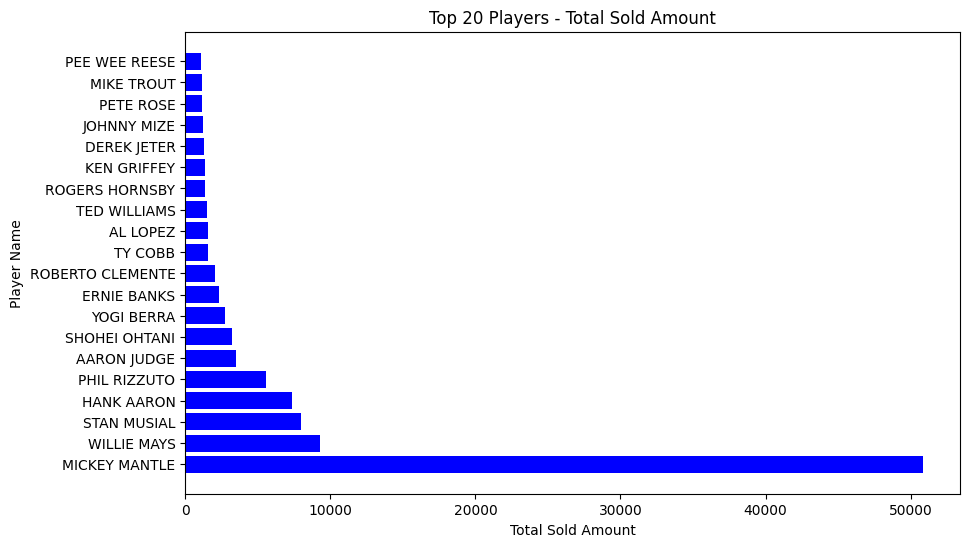

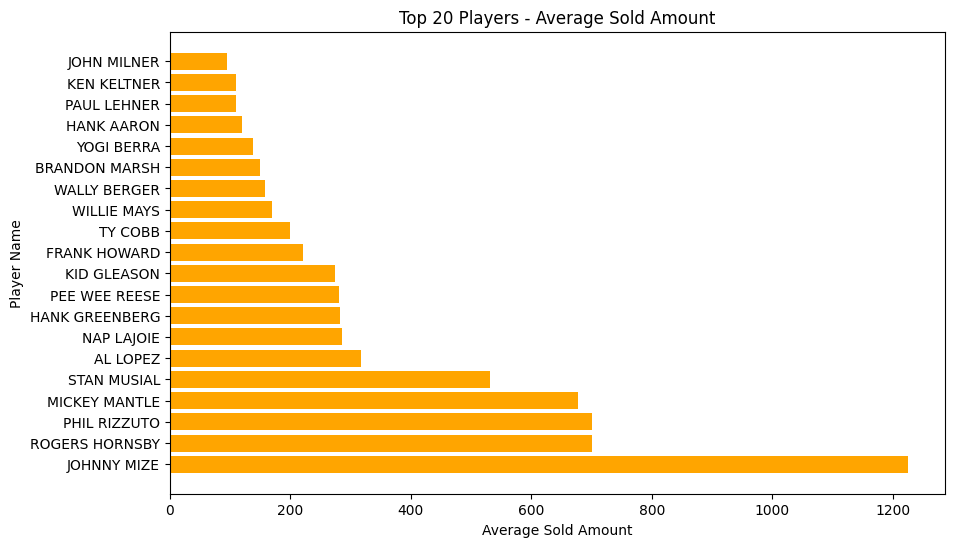

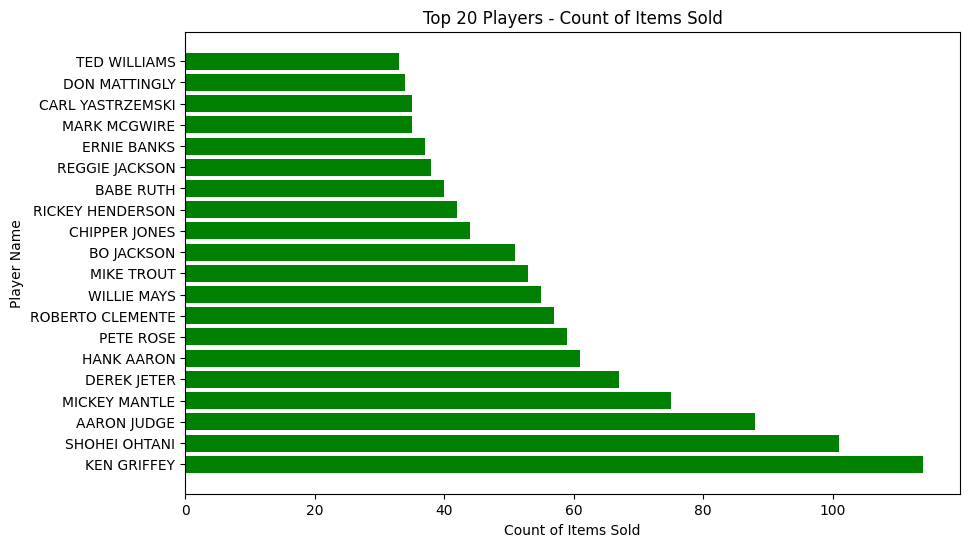

In [16]:
# Sort each metric independently to get the top 20
top_total_sold = grouped_df.sort_values('totalValueSold', ascending=False).head(20)
top_average_sold = grouped_df.sort_values('averageValueSold', ascending=False).head(20)
top_count_sold = grouped_df.sort_values('numSold', ascending=False).head(20)

# Set up the figure and axes for Total Sold chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_total_sold['playerName'], top_total_sold['totalValueSold'], color='blue')
ax.set_xlabel('Total Sold Amount')
ax.set_ylabel('Player Name')
ax.set_title('Top 20 Players - Total Sold Amount')

plt.show()

# Set up the figure and axes for Average Sold chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_average_sold['playerName'], top_average_sold['averageValueSold'], color='orange')
ax.set_xlabel('Average Sold Amount')
ax.set_ylabel('Player Name')
ax.set_title('Top 20 Players - Average Sold Amount')

plt.show()

# Set up the figure and axes for Count Sold chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_count_sold['playerName'], top_count_sold['numSold'], color='green')
ax.set_xlabel('Count of Items Sold')
ax.set_ylabel('Player Name')
ax.set_title('Top 20 Players - Count of Items Sold')

plt.show()